In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Nur zur besseren Darstellung
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
## for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
    "font.size": 8
})

# Einleitung: Prior-Posterior


Bei einer Münze sei die Wahrscheinlichkeit, Kopf $ K $ zu werfen, $ \theta $. Die Wahrscheinlichkeit, Zahl $ Z $ zu werfen, ist dann $ 1-\theta $. 

Nun betrachten wir einen neuen Einfränkler, der gerade von der Nationalbank in Umlauf gebracht wurde. Die Frage ist nun, wie gross ist $ \theta $? Weil die Münze von der seriösen Nationalbank kommt, neu ist und symmetrisch aussieht, d\"urfen wir annehmen, dass die Münze _fair_ ist, also $ \theta=0.5 $. 

Nun ist eine _reale_ Münze nie fair in dem Sinne, dass $ \theta $ _exakt_ $ 0.5 $ ist. Es gilt vielleicht 

$$
0.48<\theta <0.52
$$

aber nie $ \theta=0.500000000\ldots $. Man beachte, dass es unendlich viele Werte für $ \theta $ gibt, die zwischen $ 0 $ und $ 1 $ liegen. 

Wir möchten eine Aussage aufgrund von Daten machen, wie gross $ \theta $ tatsächlich ist. Dazu werfen wir die Münze vorläufig einmal und erhalten $ K $, was wir mit $ y=1 $ bezeichnen (wir werden dies später verallgemeinern). Das heisst, wir haben Daten über die Münze gesammelt und wollen wissen, was wir über $ \theta $ aussagen können. Wir suchen also die bedingte Wahrscheinlichkeit 

$$
P(\theta|y=1)
$$

und können die Formel von Bayes anwenden:

$$
P(\theta|y=1)=\frac{P(y=1|\theta)\cdot P(\theta)}{P(y=1)}
$$

Nun haben wir auf der rechten Seite drei Grössen, die unbekannt sind:

$$
P(y=1|\theta),\qquad P(\theta) \quad \text{und}\quad P(y=1)
$$

Obwohl $ \theta $ unendlich viele Werte annehmen kann, wollen wir $ \theta $ vorübergehend diskretisieren. Wir nehmen an, dass $ \theta $ nur die Werte von $ 0,0.1,0.2,\ldots,0.9,1 $ annehmen kann. Dann gilt für die Likelihood-Funktion $ P(y=1 | \theta) $, dass sie abhängig von $ \theta $ ist:

$$
P(y=1|\theta)
=\theta
$$

das heisst, wenn die Wahrscheinlichkeit, $ K $ zu werfen, $ \theta $ beträgt (erstes $ \theta $), so erscheint mit einer Wahrscheinlichkeit von $ \theta $ (zweites $ \theta $) auch $ K $. 

Ist zum Beispiel $ \theta=0.8 $, so ist

$$
P(y=1|0.8)
=0.8
$$


die Wahrscheinlichkeit, bei einer Wurfwahrscheinlichkeit von $ 0.8 $ Kopf zu werfen, natürlich auch $ 0.8 $ ist.

Da wir mehrere $ \theta $'s haben, haben wir auch mehrere $ P(y=1 | \theta) $'s

In [2]:
theta = np.arange(11)/10
print(theta)
likeli = np.linspace(0,1,num=11)
print(likeli)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Text(0, 0.5, '$P(y=1\\mid\\theta )$')

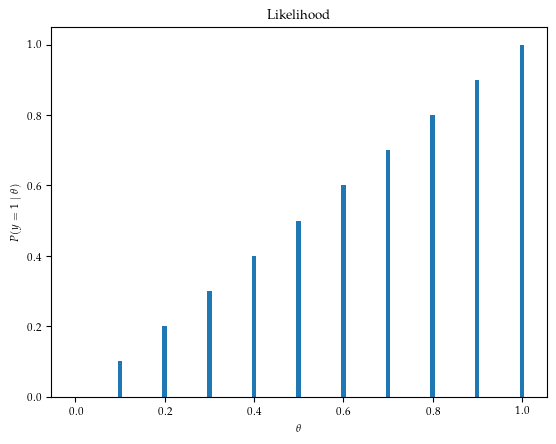

In [3]:
plt.bar(theta,likeli, width=.01)
plt.title("Likelihood")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$P(y=1\mid\theta )$")

Nun kommen wir zur Prior-Verteilung $ P(\theta) $, und hier gibt es sehr viele Möglichkeiten. Diese müssen wir allerdings vorher festlegen. Denken wir uns die Münze als eher fair, wissen es aber nicht genau, können wir eine Wahrscheinlichkeitsverteilung wie folgt w\"ahlen.

Die Prior-Werte für die $ \theta $'s sind

In [4]:
theta = np.arange(11)/10
y = np.array([0,1,2,3,4,5,4,3,2,1,0])
prior = y / np.sum(y)
print(theta)
print(y)
print(prior)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0 1 2 3 4 5 4 3 2 1 0]
[0.   0.04 0.08 0.12 0.16 0.2  0.16 0.12 0.08 0.04 0.  ]


Text(0, 0.5, '$P(\\theta)$')

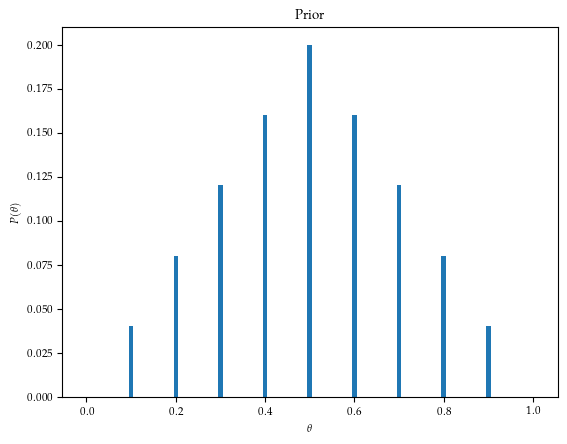

In [5]:
plt.bar(theta,prior, width=.01)
plt.title("Prior")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$P(\theta)$")

Nun können wir die Posterior-Wahrscheinlichkeiten für alle $ \theta $'s, also die Posterior-Verteilung, berechnen. So ist zum Beispiel

$$
P(0.8 | y=1)
=\frac{P(y=1 | 0.8)\cdot P(0.8)}{P(y=1)}
=\frac{0.8\cdot 0.8}{0.5}
=0.128
$$

Nun updaten wir unsere Wahrscheinlichkeiten mit der Formel von Bayes für alle $\theta$s, mit der Beobachtung, dass Kopf geworfen wurde ($y=1$):

In [6]:
posterior = (likeli*prior) / np.sum(likeli*prior)

print("Zähler", likeli*prior)
print("Nenner", np.sum(likeli*prior))
print("Posterior", posterior)

Zähler [0.    0.004 0.016 0.036 0.064 0.1   0.096 0.084 0.064 0.036 0.   ]
Nenner 0.5
Posterior [0.    0.008 0.032 0.072 0.128 0.2   0.192 0.168 0.128 0.072 0.   ]


Text(0, 0.5, '$P(\\theta\\mid y=1)$')

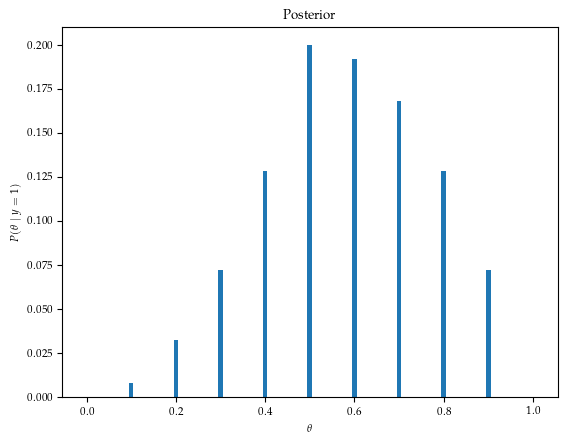

In [7]:
plt.bar(theta,posterior, width=.01)
plt.title("Posterior")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$P(\theta\mid y=1)$")

Wir sehen, dass die Prior-Verteilung durch eine leicht andere Gewichtung in die Posterior-Verteilung einfliesst. Die $ \theta $'s über $ 0.5 $ werden stärker gewichtet als die unter $ 0.5 $. 

Hätten wir Zahl ($ Z $) geworfen, so hätten wir eine höhere Gewichtung für Wurfwahrscheinlichkeiten unter $ 0.5 $.

## Verschiedene Priors

Wir betrachten als erstes eine uniform verteilte Prior-Verteilung.

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0 1 1 1 1 1 1 1 1 1 0]
[0.         0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111 0.11111111 0.        ]


Text(0, 0.5, '$P(\\theta)$')

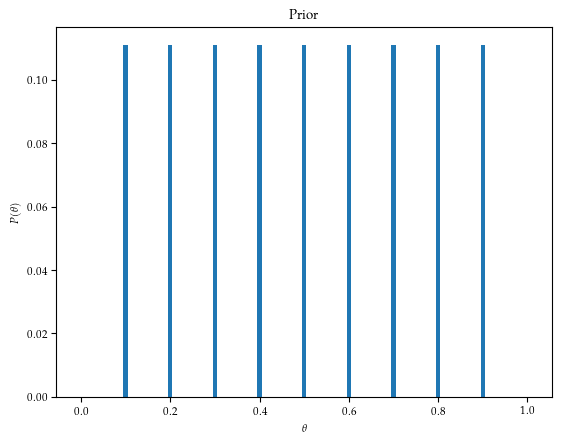

In [8]:
theta = np.arange(11)/10
y = np.array([0,1,1,1,1,1,1,1,1,1,0])
prior = y / np.sum(y)
print(theta)
print(y)
print(prior)
plt.bar(theta,prior, width=.01)
plt.title("Prior")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$P(\theta)$")

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[ 0.    1.    1.2   2.    5.   15.    5.    2.25  1.2   1.    0.  ]
[0.         0.02971768 0.03566122 0.05943536 0.14858841 0.44576523
 0.14858841 0.06686478 0.03566122 0.02971768 0.        ]


Text(0, 0.5, '$P(\\theta)$')

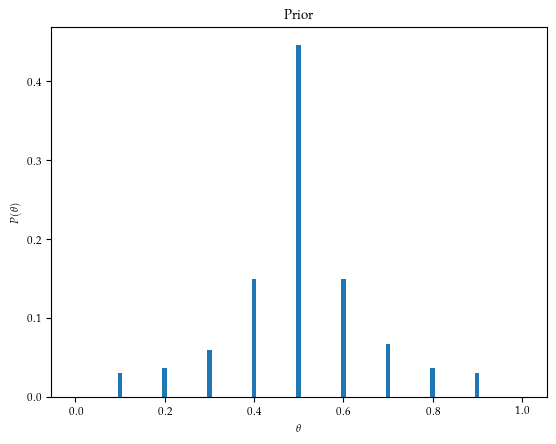

In [9]:
theta = np.arange(11)/10
y = np.array([0,1,1.2,2,5,15,5,2.25,1.2,1,0])
prior = y / np.sum(y)
print(theta)
print(y)
print(prior)
plt.bar(theta,prior, width=.01)
plt.title("Prior")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$P(\theta)$")